In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import seaborn as sns

In [2]:
#previously performed preprocessing in Seurat, then converted the seurat object to a loom file. 
#loading in loom file, results in AnnData as used by scanpy
#what changes if i dont load this in as sparse?
    adata = sc.read_loom('/project2/gilad/katie/Pilot_HumanEBs/loom/merged.VeryStrict.HarmonyBatchSampleIDindividual.5000feat.loom')

/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/loompy/loom_validator.py:48: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


In [3]:
adata

AnnData object with n_obs × n_vars = 52232 × 17066 
    obs: 'Batch', 'ClusterID', 'ClusterName', 'EmptyDrops_FDR', 'EmptyDrops_Limited', 'EmptyDrops_LogProb', 'EmptyDrops_Pvalue', 'EmptyDrops_Total', 'EmptyDrops_knee', 'SCT_snn_res_0_8', 'SCT_snn_res_1', 'SampleID', 'chimp_score', 'hg_specificity_score', 'human_score', 'individual', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'percent_mt', 'percent_rp', 'percent_rpl', 'percent_rps', 'seurat_clusters'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    obsm: 'harmony_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings'
    varm: 'harmony_feature_loadings_projected', 'pca_feature_loadings'
    layers: 'norm_data', 'scale_data'

In [4]:
#getting variable features
#this is subsetting to only these genes...is that what we want??
#sc.pp.highly_variable_genes(adata,n_top_genes=5000, subset=True)

In [5]:
sc.pp.normalize_total(adata, exclude_highly_expressed=True)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

In [6]:
#rerun PCA (already run in Seurat, but info not recognized by the sc.pp.neighbors command)
#sc.pp.pca(adata,n_comps=100)


In [7]:
#adata

In [8]:
#sc.pl.pca(adata, color="Batch")

In [9]:
#compute neighorhood grph.  Using n_PCs=20 for now as in scanpy tutorial.
#With only n_neighbors=15, the mesoderm and endoderm cells were in the same cluster. trying with 30. docs say this number 
#should be between 2 and 100

sc.pp.neighbors(adata,n_neighbors=30, n_pcs=100, use_rep="harmony_cell_embeddings")

/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/PAGA/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../minicond

In [10]:
sc.tl.umap(adata)

... storing 'Batch' as categorical
... storing 'ClusterName' as categorical
... storing 'SCT_snn_res_0_8' as categorical
... storing 'SCT_snn_res_1' as categorical
... storing 'SampleID' as categorical
... storing 'individual' as categorical
... storing 'orig_ident' as categorical
... storing 'seurat_clusters' as categorical


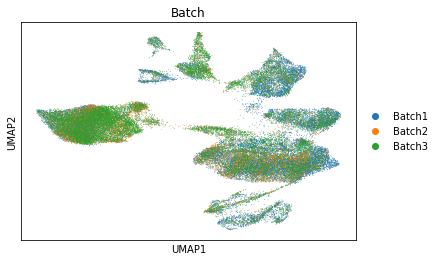

In [11]:
sc.pl.umap(adata, color='Batch')

In [12]:
adata

AnnData object with n_obs × n_vars = 52232 × 17066 
    obs: 'Batch', 'ClusterID', 'ClusterName', 'EmptyDrops_FDR', 'EmptyDrops_Limited', 'EmptyDrops_LogProb', 'EmptyDrops_Pvalue', 'EmptyDrops_Total', 'EmptyDrops_knee', 'SCT_snn_res_0_8', 'SCT_snn_res_1', 'SampleID', 'chimp_score', 'hg_specificity_score', 'human_score', 'individual', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'percent_mt', 'percent_rp', 'percent_rpl', 'percent_rps', 'seurat_clusters'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    uns: 'neighbors', 'Batch_colors'
    obsm: 'harmony_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings', 'X_umap'
    varm: 'harmony_feature_loadings_projected', 'pca_feature_loadings'
    layers: 'norm_data', 'scale_data'

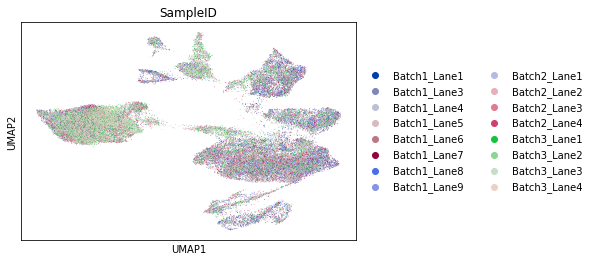

In [13]:
sc.pl.umap(adata, color='SampleID')

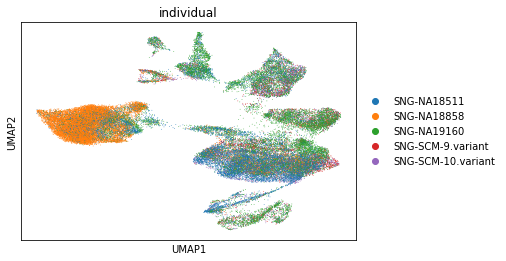

In [14]:
sc.pl.umap(adata, color='individual')

In [15]:
sc.tl.draw_graph(adata)

In [16]:
adata

AnnData object with n_obs × n_vars = 52232 × 17066 
    obs: 'Batch', 'ClusterID', 'ClusterName', 'EmptyDrops_FDR', 'EmptyDrops_Limited', 'EmptyDrops_LogProb', 'EmptyDrops_Pvalue', 'EmptyDrops_Total', 'EmptyDrops_knee', 'SCT_snn_res_0_8', 'SCT_snn_res_1', 'SampleID', 'chimp_score', 'hg_specificity_score', 'human_score', 'individual', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'percent_mt', 'percent_rp', 'percent_rpl', 'percent_rps', 'seurat_clusters'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    uns: 'neighbors', 'Batch_colors', 'SampleID_colors', 'individual_colors', 'draw_graph'
    obsm: 'harmony_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings', 'X_umap', 'X_draw_graph_fa'
    varm: 'harmony_feature_loadings_projected', 'pca_feature_loadings'
    layers: 'norm_data', 'scale_data'

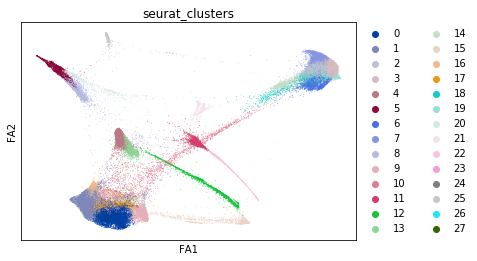

In [17]:
sc.pl.draw_graph(adata, color="seurat_clusters")

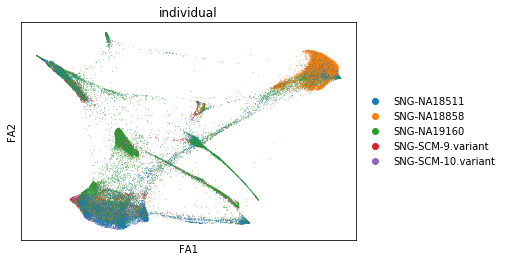

In [18]:
sc.pl.draw_graph(adata, color="individual")

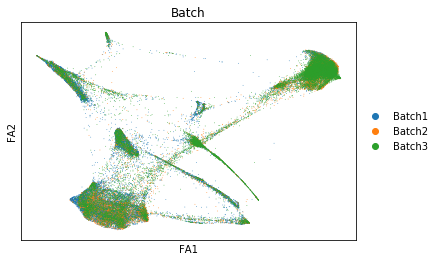

In [19]:
sc.pl.draw_graph(adata, color="Batch")

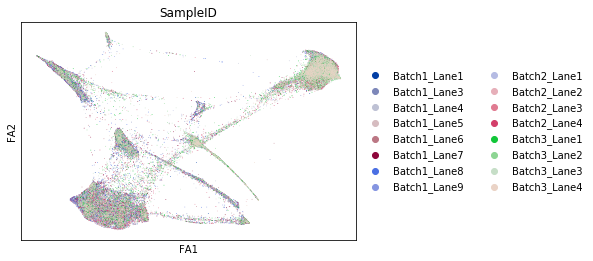

In [20]:
sc.pl.draw_graph(adata, color="SampleID")

In [21]:
#cluster cells into subgroups. leiden gaurantees connected graph, unlike louvain
#sc.tl.leiden(adata, resolution=1.25)

In [22]:
#at this would, good to label clusters based on marker genes, but i don't have labels I like yet
#using paga to map out course-grained connectivity structures
sc.tl.paga(adata, groups='seurat_clusters')

/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()
/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider u

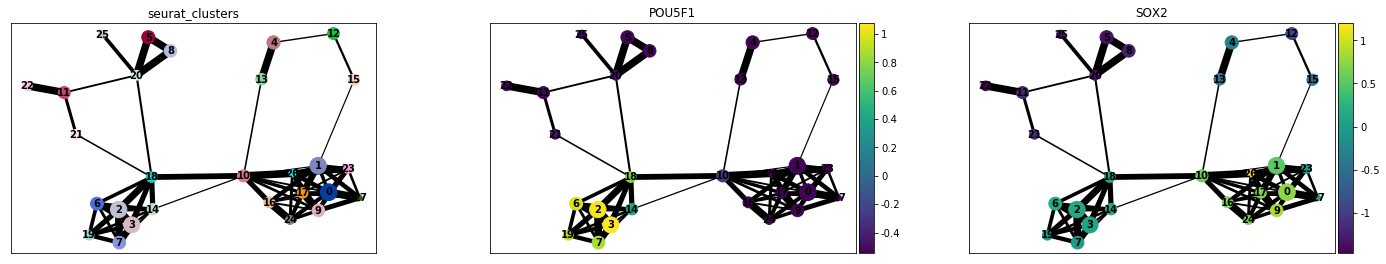

In [32]:
#plot the paga graph and label marker gene expression in each cluster identified by the leiden algorithm
#leiden groups and pluripotency markers
sc.pl.paga(adata, color=['seurat_clusters', 'POU5F1', 'SOX2'], threshold=.145)

#sc.pl.paga(adata, color=['leiden', 'POU5F1', 'SOX2'], threshold=.1)

/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()
/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider u

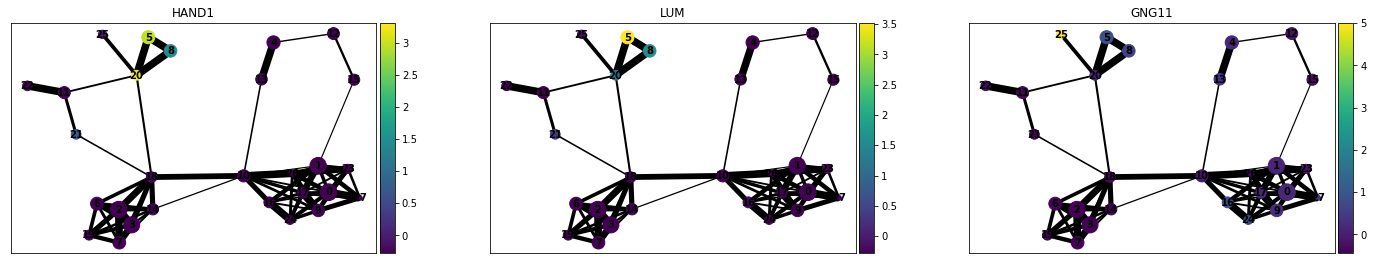

In [33]:
#plotting expression of mesoderm markers
sc.pl.paga(adata, color=['HAND1', 'LUM', 'GNG11'], threshold=.145)

/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()
/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider u

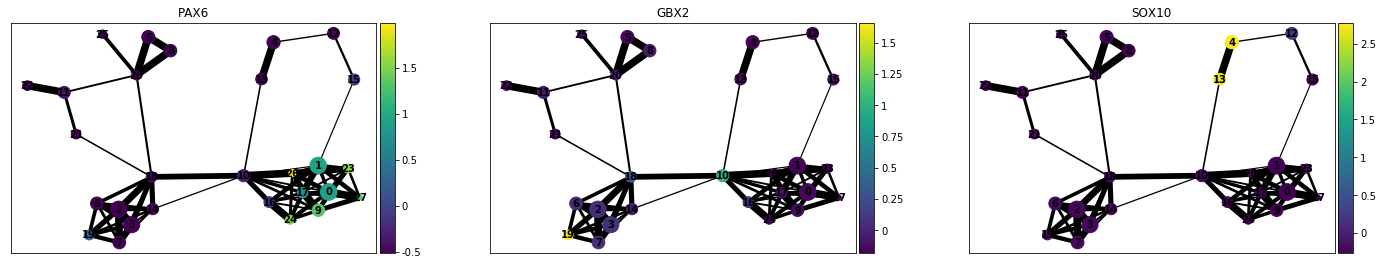

In [34]:
#expression of early ectoderm markers
sc.pl.paga(adata, color=['PAX6', 'GBX2','SOX10'],threshold=.145)

/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()
/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider u

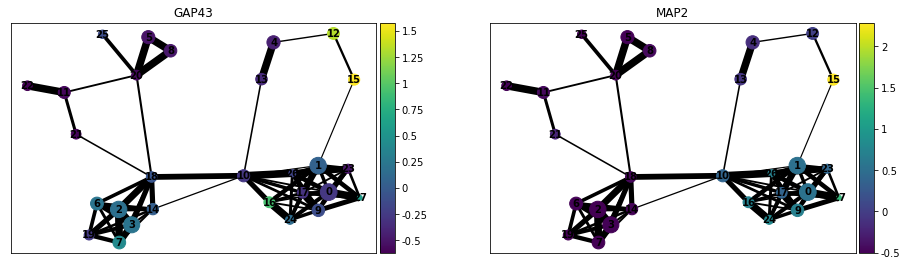

In [35]:
sc.pl.paga(adata, color=['GAP43', 'MAP2'],threshold=.145)

/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()
/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider u

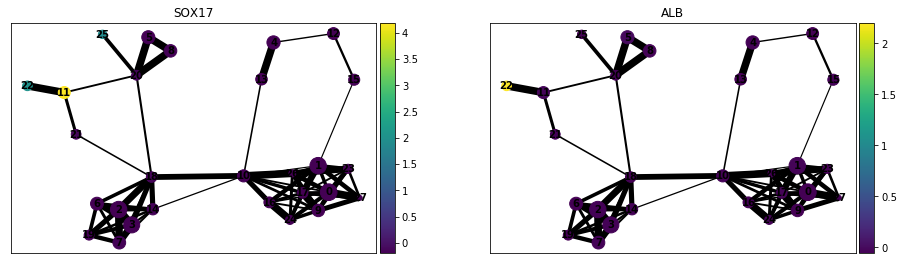

In [36]:
#expression of hepatic markers
sc.pl.paga(adata, color=['SOX17', 'ALB'],threshold=.145)

/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()
/project2/gilad/katie/miniconda3/envs/PAGA/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider u

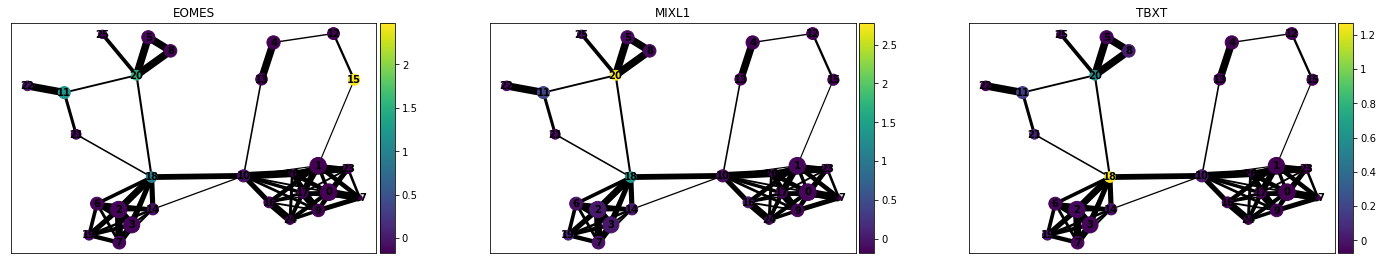

In [37]:
sc.pl.paga(adata, color=['EOMES', 'MIXL1', 'TBXT'],threshold=.145)

In [38]:
#recompute the embedding using paga initialization
#also try this with umap instead of paga initialization
sc.tl.draw_graph(adata, init_pos='paga')

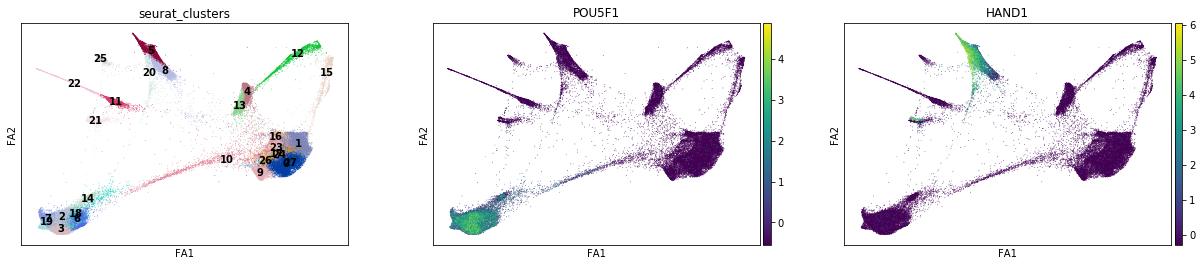

In [40]:
sc.pl.draw_graph(adata, color=['seurat_clusters', 'POU5F1', 'HAND1'], legend_loc='on data')

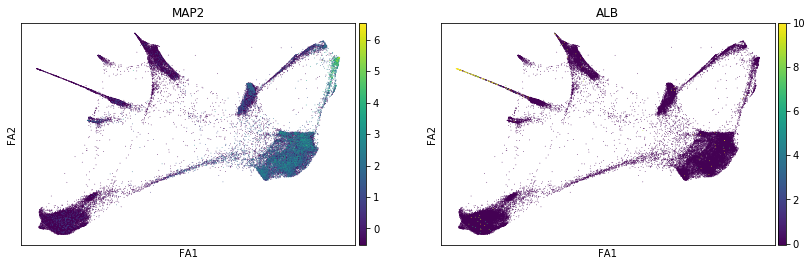

In [41]:
sc.pl.draw_graph(adata, color=['MAP2', 'ALB'], legend_loc='on data', use_raw=False)

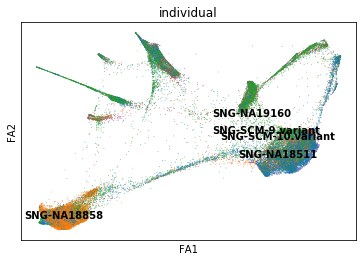

In [42]:
sc.pl.draw_graph(adata, color="individual", legend_loc='on data', use_raw=False)

In [43]:
#choose a root
adata.uns['iroot'] = np.flatnonzero(adata.obs['seurat_clusters']  == '2')[2]

In [44]:
#compute diffusion pseudotime
sc.tl.dpt(adata)

In [45]:
gene_names = ['POU5F1', 'NANOG', "EOMES", "MIXL1", "SOX17", "FOXA2", "ALB", "AFP", "HAND1", "LUM", "GNG11", "PAX6", "MAP2", "GAP43"]

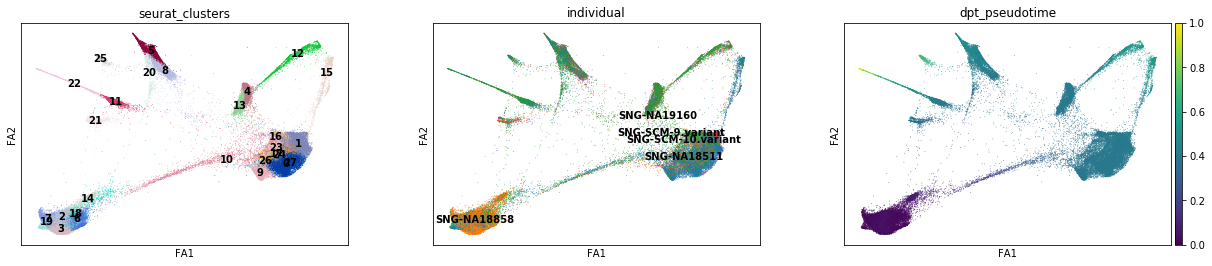

In [47]:
sc.pl.draw_graph(adata, color=['seurat_clusters','individual','dpt_pseudotime'], legend_loc='on data')

In [48]:
adata.obs

,Batch,ClusterID,ClusterName,EmptyDrops_FDR,EmptyDrops_Limited,EmptyDrops_LogProb,EmptyDrops_Pvalue,EmptyDrops_Total,EmptyDrops_knee,SCT_snn_res_0_8,...,nCount_SCT,nFeature_RNA,nFeature_SCT,orig_ident,percent_mt,percent_rp,percent_rpl,percent_rps,seurat_clusters,dpt_pseudotime
Batch1_Lane1_AAACCCACAAAGGGTC,Batch1,2,1,0.0,1,-7650.903809,0.000100,4696,4370.0,3,...,7692.0,2376,2461,human,8.773424,16.971891,10.242760,6.729131,1,0.392480
Batch1_Lane1_AAACCCAGTATCAGGG,Batch1,2,1,0.0,1,-6116.937988,0.000100,4394,4370.0,1,...,7914.0,1935,2047,human,8.192990,23.486572,13.245335,10.241238,1,0.404926
Batch1_Lane1_AAACCCATCGGAATGG,Batch1,21,20,0.0,1,-12953.576172,0.000100,14661,4370.0,4,...,9791.0,3857,3668,human,10.190301,19.357479,11.029262,8.328218,20,0.429876
Batch1_Lane1_AAACCCATCTTTGCTA,Batch1,3,2,0.0,1,-18410.820312,0.000100,26229,4370.0,0,...,9807.0,5498,3825,human,9.253117,20.244768,11.041214,9.203553,2,0.001763
Batch1_Lane1_AAACGAACAATTGAAG,Batch1,5,4,0.0,0,-7476.399902,0.013099,7502,4370.0,5,...,8292.0,2312,2311,human,7.917889,29.752066,17.395361,12.356705,4,0.403392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Batch3_Lane4_TTTGGTTGTGAATGAT,Batch3,1,0,0.0,1,-9277.801758,0.000100,7724,3508.0,6,...,14873.0,2910,3145,human,7.055930,20.585190,11.380114,9.205075,0,0.383208
Batch3_Lane4_TTTGGTTTCGAAGCCC,Batch3,4,3,0.0,1,-17034.960938,0.000100,26242,3508.0,2,...,16920.0,4950,4715,human,6.638214,28.290527,15.056017,13.234509,3,0.010672
Batch3_Lane4_TTTGGTTTCGAGATAA,Batch3,8,7,0.0,1,-18296.437500,0.000100,26900,3508.0,0,...,17093.0,5257,5018,human,5.498141,21.814127,11.955390,9.858736,7,0.002747
Batch3_Lane4_TTTGTTGAGGATATAC,Batch3,10,9,0.0,1,-15747.893555,0.000100,17489,3508.0,9,...,16641.0,4683,4683,human,3.876723,18.062782,9.943393,8.119390,9,0.397334


In [49]:
#From here, can export info and pseudotime values, map expression patterns through user-defined trajectories

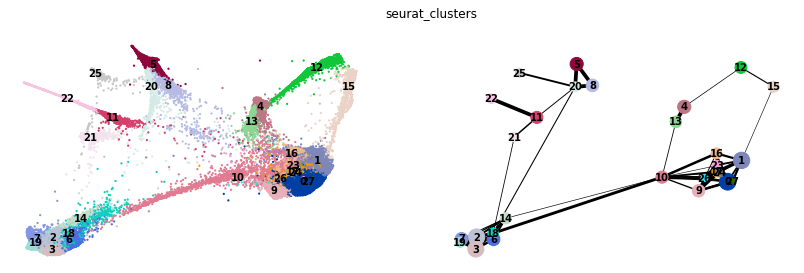

In [50]:
sc.pl.paga_compare(adata, threshold=.145, edge_width_scale=0.5, size=20, color='seurat_clusters')

In [ ]:
#sc.pl.paga_compare(adata, threshold=.145, edge_width_scale=0.5, size=20)

In [64]:
#manually defined paths
paths = [('hepatocytes', [2,18,21,11,22]),
          ('endothelial', [2,18,20,25]),
          ('mature neuron', [2,18,10,26,17,0,1,15])]

In [65]:
adata.obs['distance']= adata.obs['dpt_pseudotime']

In [66]:
adata

AnnData object with n_obs × n_vars = 52232 × 17066 
    obs: 'Batch', 'ClusterID', 'ClusterName', 'EmptyDrops_FDR', 'EmptyDrops_Limited', 'EmptyDrops_LogProb', 'EmptyDrops_Pvalue', 'EmptyDrops_Total', 'EmptyDrops_knee', 'SCT_snn_res_0_8', 'SCT_snn_res_1', 'SampleID', 'chimp_score', 'hg_specificity_score', 'human_score', 'individual', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'percent_mt', 'percent_rp', 'percent_rpl', 'percent_rps', 'seurat_clusters', 'dpt_pseudotime', 'distance'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    uns: 'neighbors', 'Batch_colors', 'SampleID_colors', 'individual_colors', 'draw_graph', 'seurat_clusters_colors', 'paga', 'seurat_clusters_sizes', 'iroot', 'diffmap_evals'
    obsm: 'harmony_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings', 'X_umap', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'harmony_feature_loadings_projected', 'pca_feature_load

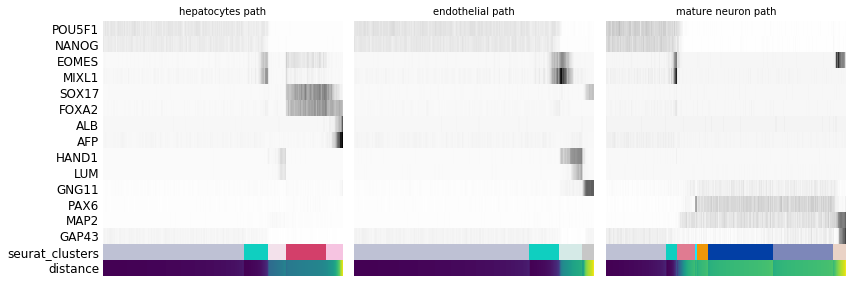

In [67]:
_, axs = pl.subplots(ncols=3, figsize=(12, 5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='seurat_clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
pl.show()

In [68]:
endo = adata[adata.obs['seurat_clusters'].isin(['2','18','20','25'])]
neur = adata[adata.obs['seurat_clusters'].isin(['2','18','10','26','17','0','1','15'])]
hep = adata[adata.obs['seurat_clusters'].isin(['2','18','21','11','22'])]

In [69]:
endo

View of AnnData object with n_obs × n_vars = 7827 × 17066 
    obs: 'Batch', 'ClusterID', 'ClusterName', 'EmptyDrops_FDR', 'EmptyDrops_Limited', 'EmptyDrops_LogProb', 'EmptyDrops_Pvalue', 'EmptyDrops_Total', 'EmptyDrops_knee', 'SCT_snn_res_0_8', 'SCT_snn_res_1', 'SampleID', 'chimp_score', 'hg_specificity_score', 'human_score', 'individual', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'percent_mt', 'percent_rp', 'percent_rpl', 'percent_rps', 'seurat_clusters', 'dpt_pseudotime', 'distance'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    uns: 'neighbors', 'Batch_colors', 'SampleID_colors', 'individual_colors', 'draw_graph', 'seurat_clusters_colors', 'paga', 'seurat_clusters_sizes', 'iroot', 'diffmap_evals'
    obsm: 'harmony_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings', 'X_umap', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'harmony_feature_loadings_projected', 'pca_featu

In [70]:
neur

View of AnnData object with n_obs × n_vars = 22688 × 17066 
    obs: 'Batch', 'ClusterID', 'ClusterName', 'EmptyDrops_FDR', 'EmptyDrops_Limited', 'EmptyDrops_LogProb', 'EmptyDrops_Pvalue', 'EmptyDrops_Total', 'EmptyDrops_knee', 'SCT_snn_res_0_8', 'SCT_snn_res_1', 'SampleID', 'chimp_score', 'hg_specificity_score', 'human_score', 'individual', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'percent_mt', 'percent_rp', 'percent_rpl', 'percent_rps', 'seurat_clusters', 'dpt_pseudotime', 'distance'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    uns: 'neighbors', 'Batch_colors', 'SampleID_colors', 'individual_colors', 'draw_graph', 'seurat_clusters_colors', 'paga', 'seurat_clusters_sizes', 'iroot', 'diffmap_evals'
    obsm: 'harmony_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings', 'X_umap', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'harmony_feature_loadings_projected', 'pca_feat

In [71]:
hep

View of AnnData object with n_obs × n_vars = 9748 × 17066 
    obs: 'Batch', 'ClusterID', 'ClusterName', 'EmptyDrops_FDR', 'EmptyDrops_Limited', 'EmptyDrops_LogProb', 'EmptyDrops_Pvalue', 'EmptyDrops_Total', 'EmptyDrops_knee', 'SCT_snn_res_0_8', 'SCT_snn_res_1', 'SampleID', 'chimp_score', 'hg_specificity_score', 'human_score', 'individual', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'percent_mt', 'percent_rp', 'percent_rpl', 'percent_rps', 'seurat_clusters', 'dpt_pseudotime', 'distance'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    uns: 'neighbors', 'Batch_colors', 'SampleID_colors', 'individual_colors', 'draw_graph', 'seurat_clusters_colors', 'paga', 'seurat_clusters_sizes', 'iroot', 'diffmap_evals'
    obsm: 'harmony_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings', 'X_umap', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'harmony_feature_loadings_projected', 'pca_featu

In [72]:
endo18511 = endo[endo.obs['individual'] =='SNG-NA18511']
endo18858 = endo[endo.obs['individual'] == 'SNG-NA18858']
endo19160 = endo[endo.obs['individual'] == 'SNG-NA19160']

(array([5.264e+03, 3.300e+01, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([0.        , 0.06376817, 0.12753634, 0.19130452, 0.25507268,
        0.31884086, 0.38260904, 0.44637722, 0.51014537, 0.5739136 ,
        0.6376817 ], dtype=float32),
 <a list of 10 Patch objects>)

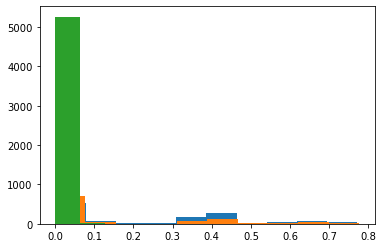

In [79]:
pl.hist(endo19160.obs['dpt_pseudotime'])
pl.hist(endo18511.obs['dpt_pseudotime'])

pl.hist(endo18858.obs['dpt_pseudotime'])

In [74]:
hep18511 = hep[hep.obs['individual'] =='SNG-NA18511']
hep18858 = hep[hep.obs['individual'] == 'SNG-NA18858']
hep19160 = hep[hep.obs['individual'] == 'SNG-NA19160']

(array([5.264e+03, 3.300e+01, 2.000e+00, 1.000e+00, 5.000e+00, 1.030e+02,
        5.800e+01, 4.000e+00, 2.000e+00, 2.000e+00]),
 array([0.        , 0.06365298, 0.12730595, 0.19095892, 0.2546119 ,
        0.31826487, 0.38191783, 0.44557083, 0.5092238 , 0.57287675,
        0.63652974], dtype=float32),
 <a list of 10 Patch objects>)

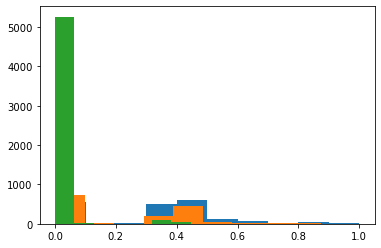

In [78]:
pl.hist(hep19160.obs['dpt_pseudotime'])
pl.hist(hep18511.obs['dpt_pseudotime'])

pl.hist(hep18858.obs['dpt_pseudotime'])

In [76]:
neur18511 = neur[neur.obs['individual'] =='SNG-NA18511']
neur18858 = neur[neur.obs['individual'] == 'SNG-NA18858']
neur19160 = neur[neur.obs['individual'] == 'SNG-NA19160']

(array([5249.,   55.,   20.,   20.,   20.,   61.,  698.,   77.,   13.,
           9.]),
 array([0.        , 0.05844131, 0.11688262, 0.17532393, 0.23376524,
        0.29220656, 0.35064787, 0.40908918, 0.4675305 , 0.5259718 ,
        0.5844131 ], dtype=float32),
 <a list of 10 Patch objects>)

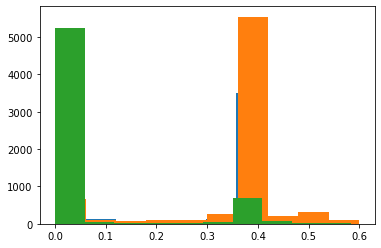

In [80]:
pl.hist(neur19160.obs['dpt_pseudotime'])
pl.hist(neur18511.obs['dpt_pseudotime'])

pl.hist(neur18858.obs['dpt_pseudotime'])